<a href="https://colab.research.google.com/github/sam0786-xyz/Machine-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
df = pd.DataFrame(housing['data'], columns=housing['feature_names'])
df['price'] = housing['target']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [ ]:
df.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
price,0


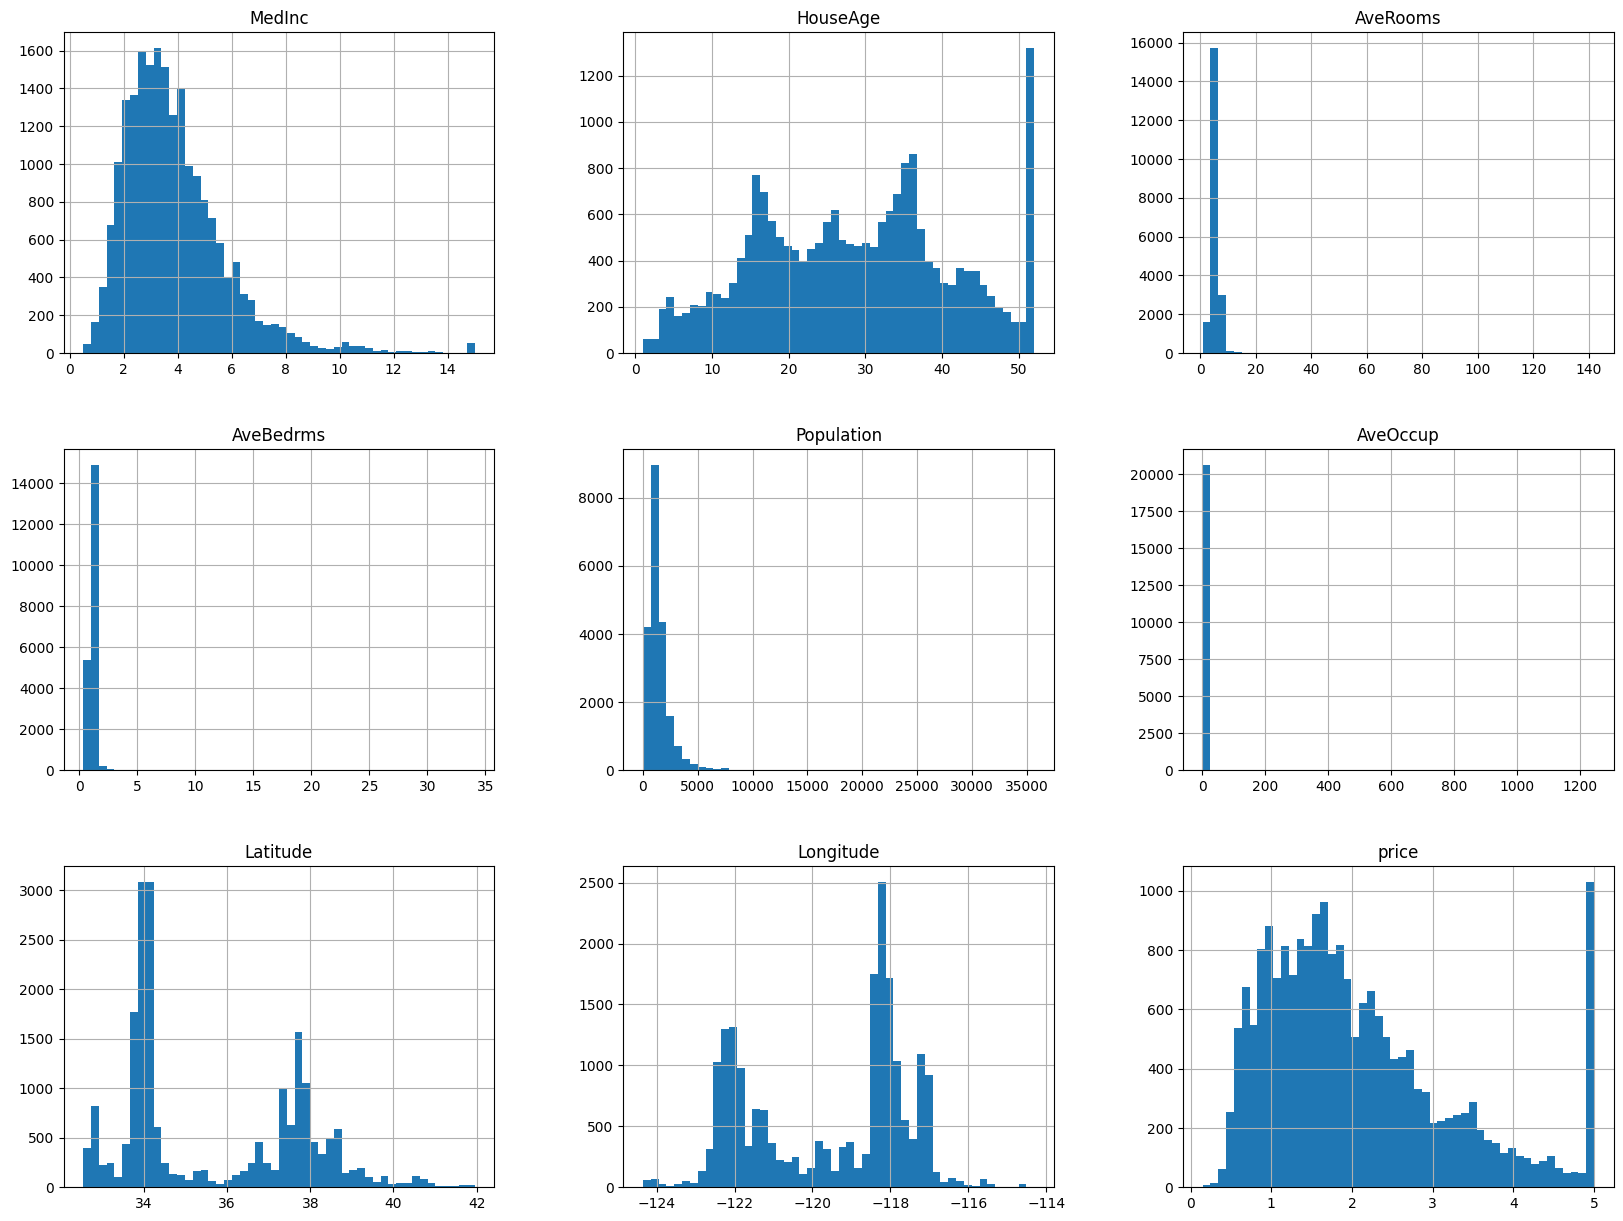

In [ ]:
df.hist(bins=50, figsize=(20,15))
plt.show()

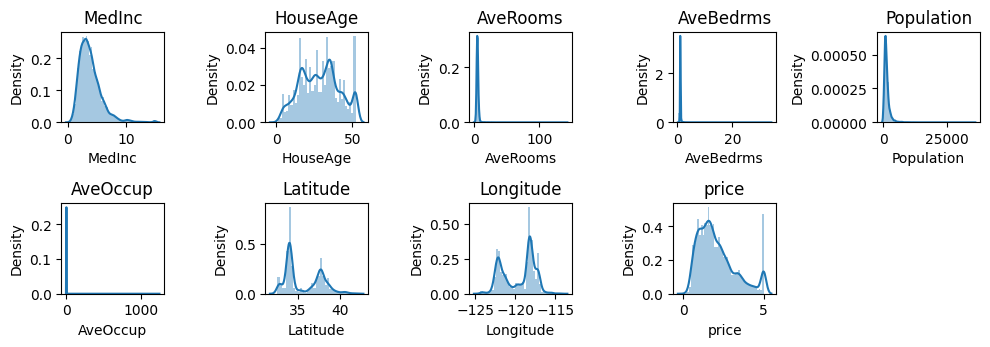

In [ ]:
plt.figure(figsize=(10,10))
for i, column in enumerate(df.columns):
    plt.subplot(6,5,i+1)
    sns.distplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.show()


In [ ]:
def handle_outliers(df, columns, n_std=3):
    df_clean = df.copy()
    for column in columns:
        # 1. IQR Method
        Q1 = df[column].quantile(0.25)  # First quartile
        Q3 = df[column].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range

        # 2. Z-score Method
        z_score = np.abs(stats.zscore(df[column]))

         # 3. Create masks for both methods
        iqr_mask = (df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)
        z_score_mask = z_score < n_std

        # 4. Combine both methods
        combined_mask = iqr_mask & z_score_mask #both will consider only when both are true

        # Replace outliers with median
        median_value = df[column].median()
        df_clean.loc[~combined_mask, column] = median_value

        print(f"Replaced {(~combined_mask).sum()} outliers in {column}")

    return df_clean


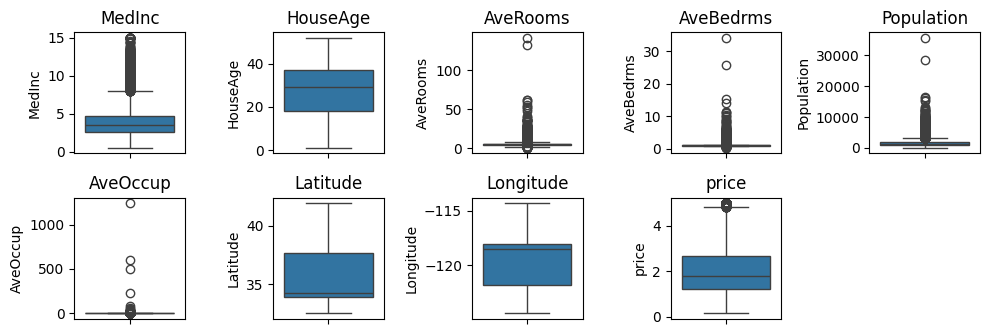

In [ ]:
plt.figure(figsize=(10, 10))
for i, column in enumerate(df.columns):
    plt.subplot(6, 5, i + 1)
    sns.boxplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [ ]:
outlier_columns = ['MedInc', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
df_clean = handle_outliers(df, outlier_columns)

Replaced 681 outliers in MedInc
Replaced 511 outliers in AveRooms
Replaced 1424 outliers in AveBedrms
Replaced 1196 outliers in Population
Replaced 711 outliers in AveOccup


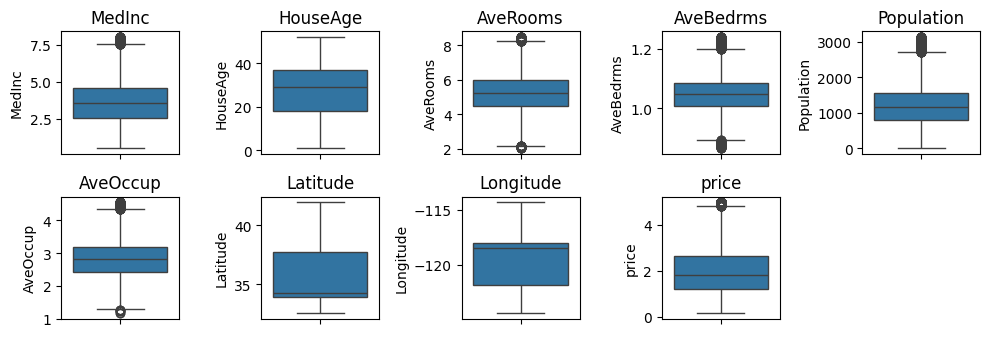

In [ ]:
plt.figure(figsize=(10, 10))
for i, column in enumerate(df_clean.columns):
    plt.subplot(6, 5, i + 1)
    sns.boxplot(df_clean[column])
    plt.title(column)
plt.tight_layout()
plt.show()

In [ ]:
# Feature Engineering
def engineer_features(df):
    df_eng = df.copy()

    # Create interaction features
    df_eng['rooms_per_household'] = df_eng['AveRooms']/df_eng['AveOccup']
    df_eng['bedrooms_per_room'] = df_eng['AveBedrms']/df_eng['AveRooms']
    df_eng['population_per_household'] = df_eng['Population']/df_eng['AveOccup']

    # Create polynomial features
    df_eng['MedInc_squared'] = df_eng['MedInc']**2
    df_eng['AveOccup_squared'] = df_eng['AveOccup']**2

    # Location-based feature
    df_eng['distance_from_center'] = np.sqrt(
        (df_eng['Latitude'] - df_eng['Latitude'].mean())**2 +
        (df_eng['Longitude'] - df_eng['Longitude'].mean())**2
    )

    return df_eng

In [ ]:
df_eng = engineer_features(df_clean)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_clean.to_csv('/content/drive/My Drive/cleaned_housing_data.csv', index=False)

In [ ]:
X = df_eng.drop('price', axis=1)
y = df_eng['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 2. Then fit the scaler on training data only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 3. Transform test data using the scaler fit on training data
X_test_scaled = scaler.transform(X_test)

In [ ]:
# 1. Model Training
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test_scaled)

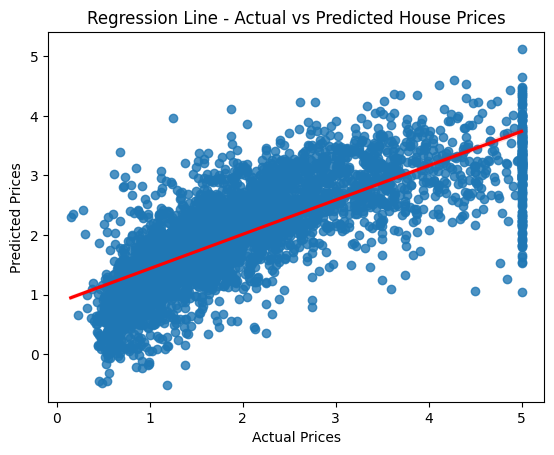

In [ ]:
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Regression Line - Actual vs Predicted House Prices")
plt.show()

In [ ]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2): {r2:.4f}")


Model Evaluation Metrics:
Mean Squared Error (MSE): 0.5638
Root Mean Squared Error (RMSE): 0.7509
R-squared (R2): 0.5697
